In [5]:
import sys

import matplotlib.pyplot as plt
from gym_super_mario_bros.actions import SIMPLE_MOVEMENT, RIGHT_ONLY
from nes_py.wrappers import JoypadSpace
import gym
import numpy as np
# import tensorflow as tf
import os
import neat
import pickle
import multiprocessing as mp
import visualize
import cv2
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")

In [30]:
from gym.wrappers import GrayScaleObservation

class SkipFrame(gym.Wrapper):
    '''
        Custom wrapper that inherits from gy.Wrapper and implements the step() function.
        Use it to return only every skip nth frame
    '''

    def __init__(self, env, skip):
        super().__init__(env)
        self._skip = skip

    def step(self, action):
        total_reward = 0.0
        done = False
        for i in range(self._skip):
            obs, reward, done, info = self.env.step(action)
            total_reward += reward
            if done:
                break
        return obs, total_reward, done, info

env = gym.make('SuperMarioBros-1-1-v1')
env = JoypadSpace(env, SIMPLE_MOVEMENT)
# env = SkipFrame(env, skip=4)

state = env.reset()

In [31]:
env.action_space

Discrete(7)

In [2]:
password = {
    '00': 1,
    '01': 2,
    '10': 3,
    '11': 4
}

def DECODE(sample: list) -> list:
    result = []
    for i in range(0, len(sample), 2):
        x = str(sample[i]) + str(sample[i+1])
        result.append(password[x])
    return result

In [3]:
genome = pickle.load(open("GARESULT.pkl", 'rb'))
genome = DECODE(genome)

In [7]:
env = gym.make('SuperMarioBros-1-1-v0')
env = JoypadSpace(env, RIGHT_ONLY)
print(env.get_action_meanings())
# env.reset()
# for action in genome:
#     state, reward, done, info = env.step(action)
#     env.render()
#     if done:
#         env.close()
#         break
# fitness = info['x_pos']

['NOOP', 'right', 'right A', 'right B', 'right A B']


In [5]:
fitness

722

In [2]:
env = gym.make('SuperMarioBros-1-1-v3')
env = JoypadSpace(env, RIGHT_ONLY)

In [3]:
print(env.get_action_meanings())

['NOOP', 'right', 'right A', 'right B', 'right A B']


In [1]:
state = env.reset()
for i in range(10000):
    state, reward, done, info = env.step(1)
    if done:
        break
    env.render()
env.close()
# state = cv2.cvtColor(state, cv2.COLOR_BGR2GRAY)
# state = cv2.pyrDown(state)

NameError: name 'env' is not defined

In [89]:
info

{'coins': 0,
 'flag_get': False,
 'life': 2,
 'score': 0,
 'stage': 1,
 'status': 'small',
 'time': 392,
 'world': 1,
 'x_pos': 296,
 'x_pos_screen': 112,
 'y_pos': 79}

In [90]:
state.shape

(240, 256, 3)

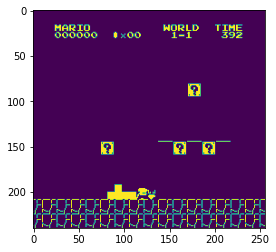

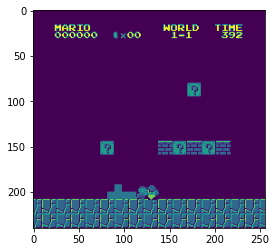

In [92]:
graystate = cv2.cvtColor(state, cv2.COLOR_BGR2GRAY)
plt.imshow(graystate)

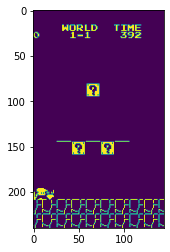

In [113]:
_, blackImage = cv2.threshold(graystate, 90, 255, cv2.THRESH_BINARY)
plt.imshow(blackImage[:, info['x_pos_screen']:])

In [114]:
print(blackImage[220, :])

[  0   0 255   0   0   0   0   0   0   0 255   0 255 255   0   0   0   0
 255   0   0   0   0   0   0   0 255   0 255 255   0   0   0   0 255   0
   0   0   0   0   0   0 255   0 255 255   0   0   0   0 255   0   0   0
   0   0   0   0 255   0 255 255   0   0   0   0 255   0   0   0   0   0
   0   0 255   0 255 255   0   0   0   0 255   0   0   0   0   0   0   0
 255   0 255 255   0   0   0   0 255   0   0   0   0   0   0   0 255   0
 255 255   0   0   0   0 255   0   0   0   0   0   0   0 255   0 255 255
   0   0   0   0 255   0   0   0   0   0   0   0 255   0 255 255   0   0
   0   0 255   0   0   0   0   0   0   0 255   0 255 255   0   0   0   0
 255   0   0   0   0   0   0   0 255   0 255 255   0   0   0   0 255   0
   0   0   0   0   0   0 255   0 255 255   0   0   0   0 255   0   0   0
   0   0   0   0 255   0 255 255   0   0   0   0 255   0   0   0   0   0
   0   0 255   0 255 255   0   0   0   0 255   0   0   0   0   0   0   0
 255   0 255 255   0   0   0   0 255   0   0   0   

In [93]:
graystate.shape

(240, 256)

In [94]:
print(graystate[200, :])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  99  99  99  99  99  99  99  99
  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99  99
  99  99  99  99  99  99   0   0   0   0 143 143 143 143 143 143 143  85
  85 202   0 202  85  85 202   0 202  85  85  85  85   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [105,   0, 105, ..., 109, 105, 105],
       [109,   0, 105, ..., 109, 109, 109],
       [  0, 109, 105, ...,   0,   0,   0]], dtype=uint8)

In [32]:
type(info['x_pos_screen'])

numpy.int64